**ЭКЗАМЕНАЦИОННЫЙ БИЛЕТ № 18**

1 вопрос (20 баллов)  
Цикл for, метод enumerate() и функция range(). С помощью цикла for и метода enumerate() найдите индекс буквы "a" в строке "Первомайский".  

Циклы позволяют многократно выполнять требуемую последовательность инструкций.   
В основе цикла for лежат последовательности (обычно – чисел). for поэлементно её перебирает и выполняет код, который записан в теле цикла. С его помощью можно совершать обход строк, списков, кортежей и иных итерируемых объектов.  
В простейшем случае он выглядит так:  
for item in collection:  
    # do something  

Если последовательность collection состоит из n элементов, for будет поочерёдно обходить их, храня значение текущего элемента в переменной item.
Для того чтобы выполнить какую-либо инструкцию строго определенное число раз, воспользуемся функцией range(): Запишем имя «Маша» 2 раза  
for i in range(2):  
&nbsp;&nbsp;&nbsp;&nbsp; print("Маша")  
Результат: Маша Маша  

range() можно представлять, как функцию, что возвращает последовательность чисел, регулируемую количеством переданных в неё аргументов. Их может быть 1, 2 или 3:  
range(stop);  
range(start, stop);  
range(start, stop, step).  

Здесь start — это первый элемент последовательности (включительно), stop — последний (не включительно), а step — разность между следующим и предыдущим членами последовательности.  
enumerate() определена на множестве итерируемых объектов и служит для создания кортежей на основании каждого из элементов объекта. Кортежи строятся по принципу (индекс элемента, элемент), что удобно, когда помимо самих элементов требуется ещё и их индекс. Например, для замены каждого n-го символа в тексте.    

my_list = list('первомайский')  
print("Indices and values in my_list:")  
for index, value in enumerate(my_list, start=0):  
&nbsp;&nbsp;&nbsp;&nbsp; if value=='а':  
        print(index)  


**2 вопрос**   
С помощью библиотеки SQLAlchemy создайте объекты таблиц базы данных Chinook. В таблице Invoice содержится информация о заказах, в таблице Customer - о клиентах. Составьте запрос, показывающий число заказов для каждой страны клиента. Клиенты из какой страны сделали наибольшее число заказов?


In [1]:
from sqlalchemy import *
from sqlalchemy.sql import *

import pandas as pd
pd.set_option('display.max_rows', 1000)
from matplotlib import pyplot as plt

engine = create_engine('sqlite:///Data/Chinook_Sqlite.sqlite')
metadata = MetaData()
metadata.reflect(bind=engine)
conn=engine.connect()

Album=Table("Album", metadata, autoload=True, autoload_with="engine")
Artist=Table("Artist", metadata, autoload=True, autoload_with="engine")
Customer=Table("Customer", metadata, autoload=True, autoload_with="engine")
Employee=Table("Employee", metadata, autoload=True, autoload_with="engine")
Track=Table("Track", metadata, autoload=True, autoload_with="engine")
Genre=Table("Genre", metadata, autoload=True, autoload_with="engine")
Invoice=Table("Invoice", metadata, autoload=True, autoload_with="engine")
InvoiceLine=Table("InvoiceLine", metadata, autoload=True, autoload_with="engine")
Playlist=Table("Playlist", metadata, autoload=True, autoload_with="engine")
PlaylistTrack=Table("PlaylistTrack", metadata, autoload=True, autoload_with="engine")

In [3]:
s=select([Customer.c.Country, func.count(Invoice.c.InvoiceId)]).group_by(Customer.c.Country).order_by(desc(func.count(Invoice.c.InvoiceId))) 
s=s.where(Customer.c.CustomerId==Invoice.c.CustomerId) 
result=conn.execute(s).fetchall() 
Task18=pd.DataFrame(result, columns=["Country","Quantity"]) 
Task18


,Country,Quantity
0,USA,91
1,Canada,56
2,France,35
3,Brazil,35
4,Germany,28
5,United Kingdom,21
6,Portugal,14
7,Czech Republic,14
8,India,13
9,Sweden,7


**3 вопрос**    
Записи набора данных imdb.csv содержат информацию о фильмах. Атрибут Revenue (Millions) каждой записи содержит значение дохода конкретного фильма. Постройте гистограмму распределения дохода для фильмов с доходом более 200.


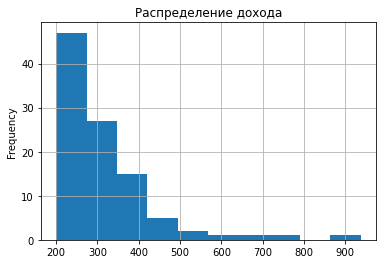

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('./Data/imdb.csv')
am=df[df['Revenue (Millions)']>200]
am['Revenue (Millions)'].plot(kind='hist',grid='True',title='Распределение дохода', bins=10); 
